In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import random

/Users/muddy_flesh/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


At here we consider the Random Ferromagnetic model, where its coupling here is just the absolute value of the couplings in EA models. In other words, the couplings of RF model follows the distribution of half normal distribution.

In [2]:
def get_bound_RF(index1, index2, bonds):
    bond = frozenset({tuple(index1),tuple(index2)})
    if bond in bonds:
        return bonds[bond]
    else:
        bonds[bond] = np.abs(np.random.standard_normal())
        return bonds[bond]

In [63]:
def increase_entry_by_one(A, j):
    A_modified = A.copy()
    A_modified[j] += 1
    return A_modified

def decrease_entry_by_one(A, j):
    A_modified = A.copy()
    A_modified[j] -= 1
    return A_modified

def get_neighbor(indices,L):
    neighbor_index = []
    for j in range(len(indices)):
        if (indices[j] == 0):
            neighbor_index.append(increase_entry_by_one(indices, j))
            indice_copy = indices.copy()
            indice_copy[j] = L-1
            neighbor_index.append(indice_copy)
        elif (indices[j] == L-1):
            neighbor_index.append(decrease_entry_by_one(indices, j))
            indice_copy = indices.copy()
            indice_copy[j] = 0
            neighbor_index.append(indice_copy)
        else:
            neighbor_index.append(increase_entry_by_one(indices, j))
            neighbor_index.append(decrease_entry_by_one(indices, j))
    return neighbor_index

In [67]:
def get_energy(spin, spin_index, neighbor_index, S):
    energy = 0
    for neighbor in neighbor_index:
        bond = get_bound_RF(spin_index, neighbor, bonds)
        energy = energy + bond*spin*S[tuple(neighbor)]
    return energy

In [66]:
def overlap(S1,S2,N):
    return np.sum(S1*S2)/N

In [68]:
def sweep(S,L,N):
    sweep = 0
    while sweep < N:
        indices = [np.random.choice(dim) for dim in S.shape]
        spin = S[tuple(indices)]
        neighbor_index = get_neighbor(indices,L)
        beforeE = get_energy(spin, indices, neighbor_index, S)
        afterE = get_energy(-spin, indices, neighbor_index, S)
        deltaE = afterE - beforeE
        if deltaE > 0:
            S[tuple(indices)] = -spin
        sweep = sweep+1

def is_active(index, S, L):
    spin = S[tuple(index)]
    neighbor_index = get_neighbor(np.asarray(index),L)
    beforeE = get_energy(spin, index, neighbor_index, S)
    afterE = get_energy(-spin, index, neighbor_index, S)
    deltaE = afterE - beforeE
    return deltaE > 0

def get_active(S,L):
    it = np.nditer(S,flags = ['multi_index'])
    active_indices = []
    while not it.finished:
        index = it.multi_index
        if is_active(index, S, L):
            active_indices.append(index)
        it.iternext()
    return active_indices

def kineticMonteCarlo(S,L,active_list):
    l = len(active_list)
    if l == 0:
        return 0
    t = 1/l
    index = random.choice(active_list)
    spin = S[tuple(index)]
    neighbor_index = get_neighbor(np.asarray(index),L)
    beforeE = get_energy(spin, index, neighbor_index, S)
    afterE = get_energy(-spin, index, neighbor_index, S)
    deltaE = afterE - beforeE
    if deltaE > 0:
        S[tuple(index)] = -spin
        active_list.remove(tuple(index))
        for nspin in neighbor_index:
            if is_active(nspin,S,L):
                if not (tuple(nspin) in active_list):
                    active_list.append(tuple(nspin))
            else:
                if (tuple(nspin) in active_list):
                    active_list.remove(tuple(nspin))
    return t

In [69]:
bonds = dict()
length = 100
dimension = 2
N = length ** dimension
model = 'RF'
config = np.random.choice([-1, 1], size=tuple([length] * dimension))
S2 = config.copy()
S1 = config.copy()

1.0


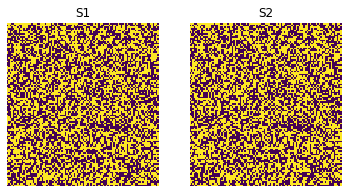

In [70]:
figure = plt.figure(figsize=(6, 3))
figure.add_subplot(1, 2, 1)
plt.title('S1')
plt.axis("off")
plt.pcolor(S1)
figure.add_subplot(1, 2, 2)
plt.title('S2')
plt.axis("off")
plt.pcolor(S2)
print(overlap(S1,S2,N))

In [72]:
survival1 = 0
survival2 = 0
while len(get_active(S1,length)) != 0:
    sweep(S1,length,N)
    survival1 = survival1 + 1
while len(get_active(S2,length)) != 0:
    sweep(S2,length,N)
    survival2 = survival2 + 1

In [73]:
overlap(S1,S2,N)

0.427